In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train = pd.read_csv("../data/csv/train.csv")
train.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1
1,id_02mh3w48pmyc9.jpg,0
2,id_02rpb463h9d3w.jpg,0
3,id_02wc3jeeao8ol.jpg,1
4,id_03t2hapb8wz8p.jpg,1


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_id  1619 non-null   object
 1   Label     1619 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.4+ KB


In [27]:
test = pd.read_csv("../data/csv/test.csv")
test.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_id  1080 non-null   object
dtypes: object(1)
memory usage: 8.6+ KB


In [29]:
train.groupby("Label")["Image_id"].count()

Label
0    810
1    809
Name: Image_id, dtype: int64

/home/toshiki/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

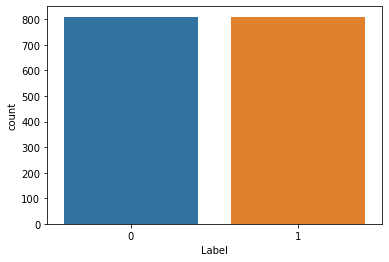

In [30]:
sns.countplot(train["Label"])

## Image 

In [60]:
import os
import cv2
import numpy as np

### Visualize

In [58]:
train["image_path"] = train["Image_id"].apply(lambda x: os.path.join("../data/image", x))
test["image_path"] = test["Image_id"].apply(lambda x: os.path.join("../data/image", x))

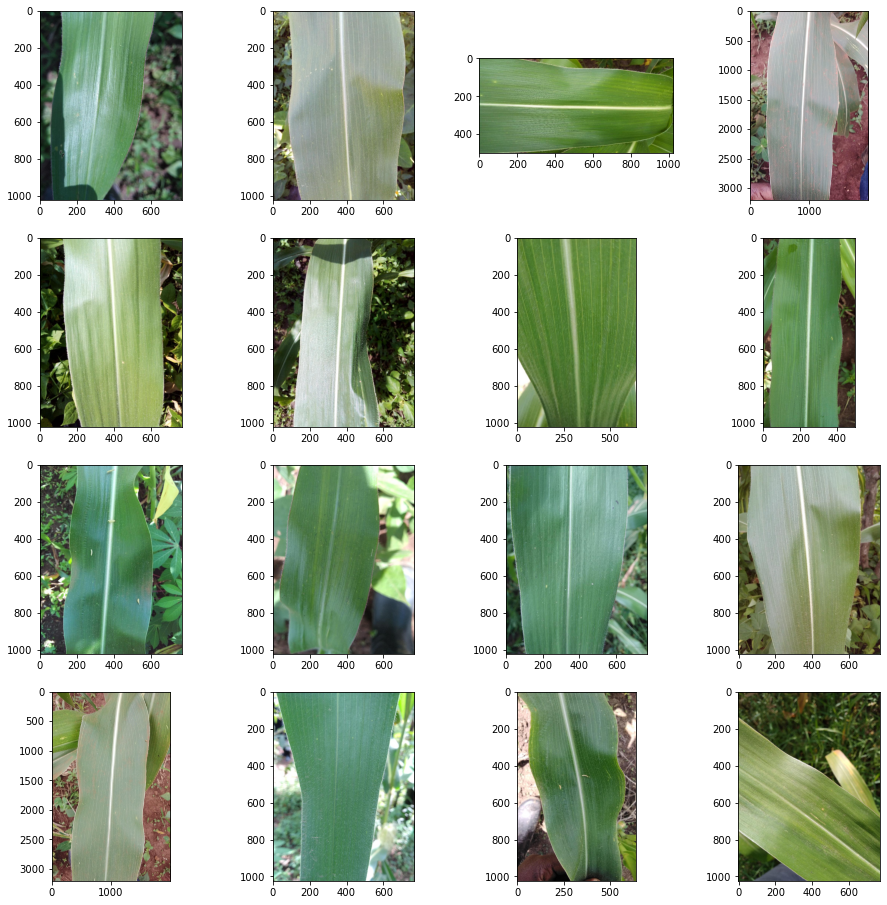

In [73]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, image_path in enumerate(train.query("Label == 0").head(16)["image_path"].values):
    image = cv2.imread(image_path)
    axes[i // 4, i % 4].imshow(image[...,::-1])    

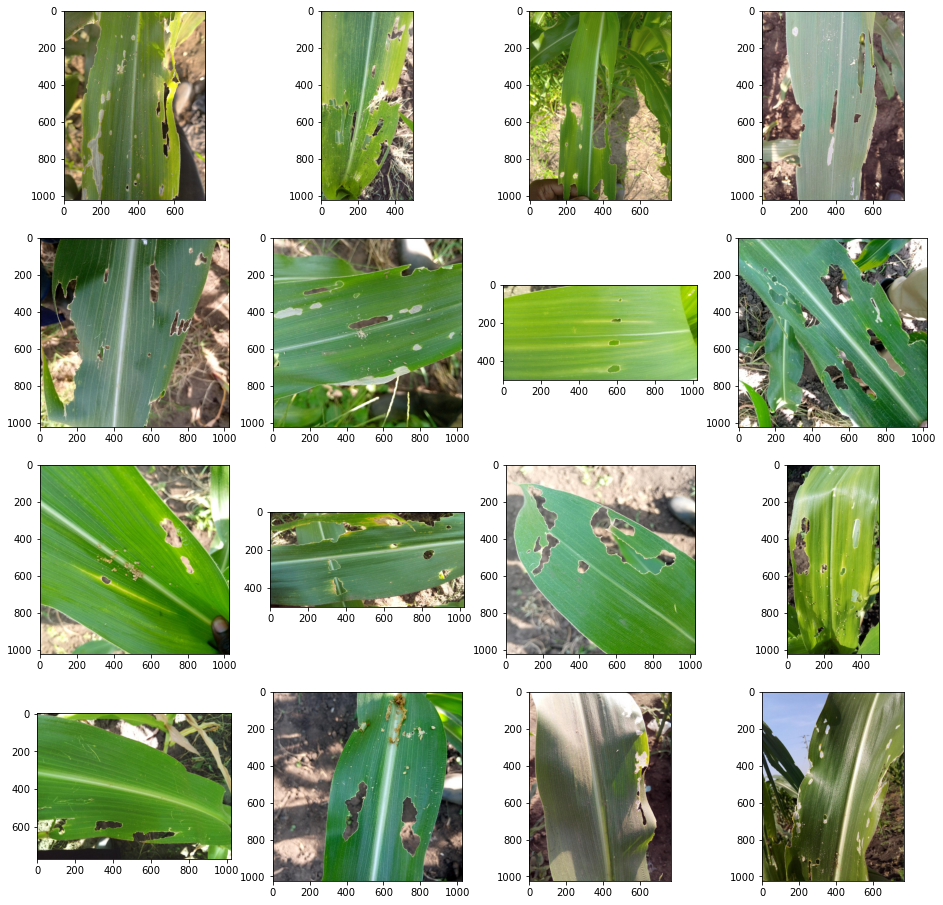

In [72]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, image_path in enumerate(train.query("Label == 1").head(16)["image_path"].values):
    image = cv2.imread(image_path)
    axes[i // 4, i % 4].imshow(image[...,::-1])    

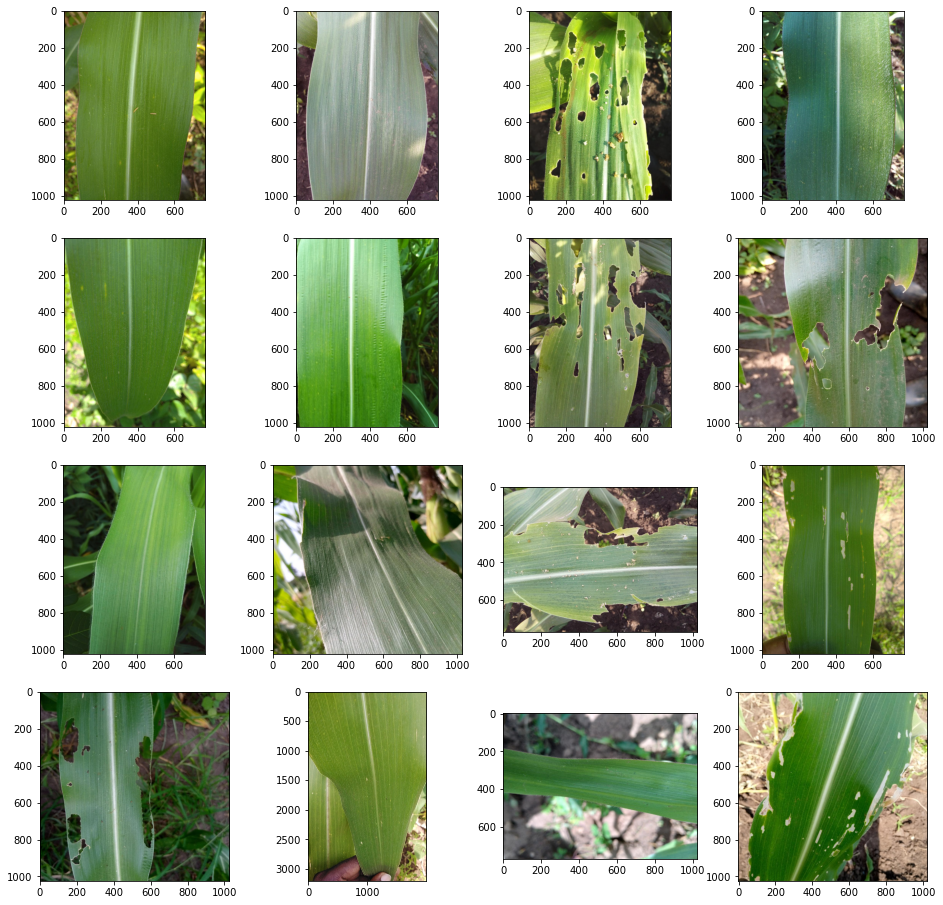

In [71]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, image_path in enumerate(test.head(16)["image_path"].values):
    image = cv2.imread(image_path)
    axes[i // 4, i % 4].imshow(image[...,::-1])    

### Remove margin

In [68]:
# def vertical_split(image):
#     images = np.split(image, np.where((image == [255, 255, 255]).all(axis=0))[0], axis=1)
#     for image in images:
#         if all(image == 255):
#             continue
#         return image

### Size

In [32]:
df = pd.concat([train, test], axis=0).reset_index(drop=True)
df.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1.0
1,id_02mh3w48pmyc9.jpg,0.0
2,id_02rpb463h9d3w.jpg,0.0
3,id_02wc3jeeao8ol.jpg,1.0
4,id_03t2hapb8wz8p.jpg,1.0


In [33]:
df["image_path"] = df["Image_id"].apply(lambda x: os.path.join("../data/image", x))

In [34]:
heights, widths = [], []
for image_path in df["image_path"].values:
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    heights.append(height)
    widths.append(width)

df["height"] = heights
df["width"] = widths

In [41]:
df["train"] = df["Label"].apply(lambda x: x is not None)
df["Label"] = df["Label"].fillna(-1)

In [42]:
df.head()

,Image_id,Label,image_path,height,width,train
0,id_02amazy34fgh2.jpg,1.0,../data/image/id_02amazy34fgh2.jpg,1024,765,True
1,id_02mh3w48pmyc9.jpg,0.0,../data/image/id_02mh3w48pmyc9.jpg,1024,768,True
2,id_02rpb463h9d3w.jpg,0.0,../data/image/id_02rpb463h9d3w.jpg,1024,768,True
3,id_02wc3jeeao8ol.jpg,1.0,../data/image/id_02wc3jeeao8ol.jpg,1024,498,True
4,id_03t2hapb8wz8p.jpg,1.0,../data/image/id_03t2hapb8wz8p.jpg,1024,765,True


In [43]:
df.describe()

,Label,height,width
count,2699.000000,2699.000000,2699.000000
mean,-0.100408,1067.960726,879.156725
std,0.830700,416.722878,292.866761
min,-1.000000,498.000000,498.000000
25%,-1.000000,1024.000000,765.000000
50%,0.000000,1024.000000,768.000000
75%,1.000000,1024.000000,1024.000000
max,1.000000,3200.000000,3200.000000


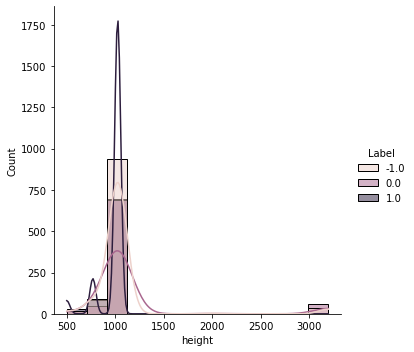

In [49]:
sns.displot(data=df, x="height", hue="Label", kde=True)

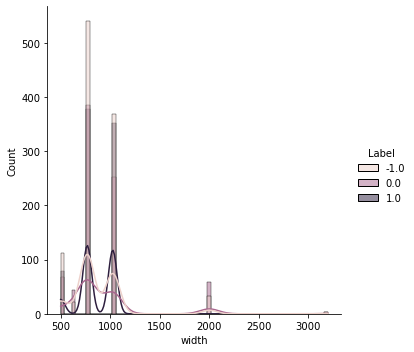

In [50]:
sns.displot(data=df, x="width", hue="Label", kde=True)

In [75]:
import pandas as pd
from sklearn.metrics import roc_auc_score

In [78]:
oof_loss = pd.read_csv("../src/exp_001/outputs/oof_loss.csv")
oof_loss["oof"] = (oof_loss["oof_0"] < oof_loss["oof_1"]).astype(int)
oof_loss.head()

,Image_id,Label,image_path,fold,oof_0,oof_1,oof
0,id_02amazy34fgh2.jpg,1,../../data/image/id_02amazy34fgh2.jpg,4,0.000001,0.999999,1
1,id_02mh3w48pmyc9.jpg,0,../../data/image/id_02mh3w48pmyc9.jpg,0,0.000002,0.999998,1
2,id_02rpb463h9d3w.jpg,0,../../data/image/id_02rpb463h9d3w.jpg,2,0.999988,0.000012,0
3,id_02wc3jeeao8ol.jpg,1,../../data/image/id_02wc3jeeao8ol.jpg,1,0.999866,0.000134,0
4,id_03t2hapb8wz8p.jpg,1,../../data/image/id_03t2hapb8wz8p.jpg,1,0.999969,0.000032,0


In [80]:
oof_score = pd.read_csv("../src/exp_001/outputs/oof_score.csv")
oof_score["oof"] = (oof_loss["oof_0"] < oof_loss["oof_1"]).astype(int)
oof_score.head()

,Image_id,Label,image_path,fold,oof_0,oof_1,oof
0,id_02amazy34fgh2.jpg,1,../../data/image/id_02amazy34fgh2.jpg,4,0.000002,0.999997,1
1,id_02mh3w48pmyc9.jpg,0,../../data/image/id_02mh3w48pmyc9.jpg,0,0.000004,0.999996,1
2,id_02rpb463h9d3w.jpg,0,../../data/image/id_02rpb463h9d3w.jpg,2,0.999970,0.000030,0
3,id_02wc3jeeao8ol.jpg,1,../../data/image/id_02wc3jeeao8ol.jpg,1,0.999715,0.000285,0
4,id_03t2hapb8wz8p.jpg,1,../../data/image/id_03t2hapb8wz8p.jpg,1,0.999928,0.000072,0


In [79]:
roc_auc_score(oof_loss["Label"], oof_loss["oof"])

0.5037677974637184